# CUSTOMER SEGMENTATION

In this section I will try to make a RFM analysis for a company to segment their customers.

<img src='https://res.cloudinary.com/upwork-cloud/image/upload/c_scale,w_1000/v1685022331/catalog/1661722892270686208/s5fnt55xnirfeyitsbor.jpg' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='' target= _blank> Can get data from this link

### Imports

In [2]:
import pandas as pd
import warnings
import sqlite3
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from matplotlib import pyplot as plt
pio.templates.default = "plotly_white"
warnings.filterwarnings("ignore")
from datetime import datetime

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

### Read Data

In [3]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

### EDA

In [4]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [5]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [6]:
df[df["Customers.id"]==797]

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.2,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.8,7.5,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN


In [7]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [8]:
# fill null Customers.customer_type  with mode
df['Customers.customer_type'].fillna(df['Customers.customer_type'].mode()[0], inplace=True)
df['Customers.customer_type'] = df['Customers.customer_type'].astype('int64')

In [9]:
df = df.dropna(subset=['Products.id'])

In [10]:

df = df.dropna(subset=['Orders.placed_date'])

In [11]:

df = df.dropna(subset=['Orders.payment_status'])

### Dividing into 3 dfs

In [12]:
# Customers DataFrame
customers_df = df[[col for col in df.columns if col.startswith('Customers.')]]
#customers_df.columns = [col.split('.')[1] for col in customers_df.columns]

# Products DataFrame 
products_df = df[[col for col in df.columns if col.startswith('Products.')]]
#products_df.columns = [col.split('.')[1] for col in products_df.columns]

# Orders DataFrame
orders_df = df[[col for col in df.columns if col.startswith('Orders.') or col.startswith('Order_Items.')]]
#orders_df.columns = [col.split('.')[1] for col in orders_df.columns]


In [13]:
customers_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0


In [14]:
# drop Customers. from customers_df column name

customers_df.columns = [col.split('.')[1] for col in customers_df.columns]

In [15]:
customers_df.head()

,id,fname,lname,company,create_date,status,mailing,reminders,tax_exempt,account_id,sales_rep,rewards,profile_id,last_modified,customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0


In [16]:
customers_df.isnull().sum() # I need to fill customer_type before divide three dfs

id                  0
fname               0
lname               0
company          3325
create_date         0
status           3941
mailing          1976
reminders        4032
tax_exempt       4027
account_id       4030
sales_rep        4032
rewards          4032
profile_id       4032
last_modified       0
customer_type       0
dtype: int64

In [17]:
customers_df['create_date'] = pd.to_datetime(customers_df['create_date'], unit='s')

customers_df['create_date'] = pd.to_datetime(customers_df['create_date']).dt.date

customers_df['last_modified'] = pd.to_datetime(customers_df['last_modified'], unit='s')

customers_df['last_modified'] = pd.to_datetime(customers_df['last_modified']).dt.date

In [18]:
# if orders_df column name starts with 'Orders.' then drop 'Orders.' else convert 'Order_Items.' to 'item_'
orders_df.columns = [col.split('.')[1] if col.startswith('Orders.') else 'item_' + col.split('.')[1] for col in orders_df.columns]

In [19]:
orders_df.head()

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type,item_id,item_parent,item_product_id,item_product_name,item_attributes,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [20]:
orders_df[orders_df["customer_id"] == 3]

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type,item_id,item_parent,item_product_id,item_product_name,item_attributes,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN


In [21]:
orders_df[orders_df["id"] == 16186]

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type,item_id,item_parent,item_product_id,item_product_name,item_attributes,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags
3845,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18833,16186,11168.0,"Disposable Tissue/Poly Flat Stretcher Sheets, ...",NaN,NaN,NaN,2,29.00,20.00,NaN,NaN,NaN,NaN,NaN
3846,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18834,16186,11161.0,Standard Facial Tissues,NaN,NaN,NaN,9,3.25,0.59,NaN,NaN,NaN,NaN,NaN
3847,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18835,16186,1475.0,Micro-Kill+ Disinfectant Wipes,NaN,NaN,NaN,2,19.81,6.39,NaN,NaN,NaN,NaN,NaN
3848,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18836,16186,25612.0,"Dynarex 3672, Triangular Bandage 36x36x51 - 12/Bx",NaN,NaN,NaN,2,19.80,3.60,NaN,NaN,NaN,NaN,NaN
3849,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18837,16186,25558.0,"Dynarex 3596, Athletic Tape, 1&frac12;"" x 15 y...",NaN,NaN,NaN,1,48.99,35.50,NaN,NaN,NaN,NaN,NaN
3850,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18838,16186,2144.0,"Caring Non-Sterile Latex Self-Adherent Wrap, Tan",NaN,NaN,NaN,1,27.35,18.86,NaN,NaN,NaN,NaN,NaN
3851,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,18839,16186,4324.0,"Solstice Nitrile Powder-Free Exam Gloves, Dark...",NaN,NaN,NaN,3,17.05,5.50,NaN,NaN,NaN,NaN,NaN
3852,16186,3399,Benjamin,Dewitt,NaN,16186,NaN,NaN,NaN,USD,NaN,376.23,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.18,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.461860e+09,NaN,authorize.net,NaN,386.18,NaN,8355405837,02708Z,NaN,5,1461789955,1.461860e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [22]:
orders_df["placed_date"].value_counts()

placed_date
1461789955    10
1454643501     9
1460743167     8
1445891492     8
1459729508     6
              ..
1435775967     1
1435783232     1
1435785222     1
1435839762     1
1463418095     1
Name: count, Length: 3433, dtype: int64

In [23]:
orders_df["shipping"] = orders_df["total"] - orders_df["subtotal"] # I need to drop which product_id and payment_status is null before dividing

In [24]:
orders_df.isnull().sum()

id                           0
customer_id                  0
fname                        0
lname                        0
company                   3324
order_number                 0
reorder_id                3961
external_source           3704
external_id               4027
currency                     0
sales_rep                 4032
subtotal                     0
tax                        436
shipping                     0
coupon_id                 3167
coupon_amount             3167
gift_id                   4032
gift_amount               4032
fee_name                  3827
fee_amount                3782
discount_name             3773
discount_amount           3701
total                        0
balance_due               3727
shipping_carrier           593
shipping_method            428
shipping_trans            4032
shipping_flags            4032
weight                    4029
tracking                   359
payment_status               0
payment_date                15
payment_

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 0 to 4193
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Products.id                     4032 non-null   float64
 1   Products.status                 4032 non-null   float64
 2   Products.product_type           0 non-null      float64
 3   Products.template               3968 non-null   object 
 4   Products.vendor                 4032 non-null   float64
 5   Products.import_id              4032 non-null   float64
 6   Products.name                   4032 non-null   object 
 7   Products.display_name           3658 non-null   object 
 8   Products.menu_name              0 non-null      float64
 9   Products.list_price             4012 non-null   float64
 10  Products.price                  4031 non-null   float64
 11  Products.sale_price             1159 non-null   float64
 12  Products.cost                   4032 no

In [26]:
orders_df['placed_date'] = pd.to_datetime(orders_df['placed_date'], unit='s')

In [27]:
orders_df['placed_date'] = pd.to_datetime(orders_df['placed_date']).dt.date

In [28]:
orders_df["id"].value_counts()

id
16186    10
12450     9
15667     8
7357      8
15108     6
         ..
4750      1
4752      1
4753      1
4757      1
17434     1
Name: count, Length: 3433, dtype: int64

In [29]:
# drop Products. from products_df column name

products_df.columns = [col.split('.')[1] for col in products_df.columns]

In [30]:
products_df.head()

,id,status,product_type,template,vendor,import_id,name,display_name,menu_name,list_price,price,sale_price,cost,flags,left_flag,right_flag,last_modified,taxable,shopping_gtin,shopping_brand,shopping_mpn,shopping_gender,shopping_color,shopping_age,shopping_flags,amazon_asin,amazon_type,amazon_item_type,amazon_price,google_shopping_id,google_shopping_type,google_shopping_cat,google_adwords,shopping_cat,shopping_type,pricegrabber_cat,shopzilla_cat,thefind_cat,quickbooks_id,qb_edit_sequence,price_break_type,price_breaks,short_description,long_description,websites,video,audio,seo_title,seo_description,seo_keywords,seo_header,seo_footer,seo_url,seo_category,unit,packaging,display_packaging,multiple,length,width,height,rx,latex,upc,msds_link,msds_label,lit_link,lit_label,hcpcs,case_qty,markup,override_markup,notes,import_flags,map_price,features_title,warranty,hygienic,default_quantity,user_size,assembly,installation,shipping_length,shipping_width,shipping_height,shipping_weight,handling_time,rotation_link,google_shopping_label,product_option,size,material,arm_style,leg_style,seat_size,family_id,saved_status,freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.70,57.64,NaN,44.00,0.0,NaN,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,NaN,Green,NaN,62.0,B00I6GQE0A,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,NaN,NaN,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,NaN,NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,177.0,1.0,NaN,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,NaN,14.41,10.29,5.0,1.87,65.0,NaN,NaN,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,NaN,NaN,NaN,62.0,B000QF7Y76,NaN,health-care-products,NaN,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,NaN,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,NaN,NaN,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,NaN,NaN,NaN,Urinary Drain Bags | MEDLINE - DYNC1674H,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,1.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,96.29,68.78,NaN,52.50,32896.0,NaN,NaN,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,NaN,Blue,NaN,62.0,B002209AOI,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,NaN,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800087BB-1438898332,1.450321e+09,NaN,NaN,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,NaN,NaN,NaN,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Ni

In [31]:
products_df.isnull().sum()

id                          0
status                      0
product_type             4032
template                   64
vendor                      0
import_id                   0
name                        0
display_name              374
menu_name                4032
list_price                 20
price                       1
sale_price               2873
cost                        0
flags                    1050
left_flag                2793
right_flag               4032
last_modified               0
taxable                  1078
shopping_gtin             907
shopping_brand              5
shopping_mpn                3
shopping_gender          3794
shopping_color           2334
shopping_age             4030
shopping_flags            120
amazon_asin              1100
amazon_type              4032
amazon_item_type           22
amazon_price             3441
google_shopping_id        257
google_shopping_type       58
google_shopping_cat        26
google_adwords           4032
shopping_c

In [32]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4032 entries, 0 to 4193
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4032 non-null   int64  
 1   fname          4032 non-null   object 
 2   lname          4032 non-null   object 
 3   company        707 non-null    object 
 4   create_date    4032 non-null   object 
 5   status         91 non-null     float64
 6   mailing        2056 non-null   float64
 7   reminders      0 non-null      float64
 8   tax_exempt     5 non-null      float64
 9   account_id     2 non-null      float64
 10  sales_rep      0 non-null      float64
 11  rewards        0 non-null      float64
 12  profile_id     0 non-null      float64
 13  last_modified  4032 non-null   object 
 14  customer_type  4032 non-null   int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 504.0+ KB


In [33]:
# Fill null values in orders_df.item_cost with matching values from products_df.cost
orders_df['item_cost'] = orders_df.apply(
    lambda row: products_df.loc[products_df['id'] == row['item_product_id'], 'cost'].values[0] 
    if pd.isnull(row['item_cost']) else row['item_cost'], 
    axis=1
)

In [34]:
orders_df[orders_df["item_cost"].isnull()]

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type,item_id,item_parent,item_product_id,item_product_name,item_attributes,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags


In [35]:
orders_df.head()

,id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,sales_rep,subtotal,tax,shipping,coupon_id,coupon_amount,gift_id,gift_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,shipping_trans,shipping_flags,weight,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,purchase_order,payment_id,payment_code,payment_ref,status,placed_date,updated_date,shipped_date,comments,notes,registry_id,gift_message,website,mailing,flags,partial_ship,customer_type,item_id,item_parent,item_product_id,item_product_name,item_attributes,item_attribute_names,item_attribute_prices,item_qty,item_price,item_cost,item_registry_item,item_related_id,item_reorder_frequency,item_account_id,item_flags
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,7.09,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,2015-03-10,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5284,3758,2310.0,"Basic Rollators, Green",NaN,NaN,NaN,1,57.20,44.00,NaN,NaN,NaN,NaN,NaN
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,2013-12-03,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31,23,177.0,"Urinary Drain Bags,0.000",NaN,NaN,NaN,4,5.00,1.87,NaN,NaN,NaN,NaN,2.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,2015-12-08,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",NaN,NaN,NaN,1,68.78,52.50,NaN,NaN,NaN,NaN,NaN
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.99,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,2013-12-11,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1816,29,983.0,Basket for 2-Button Walkers,NaN,NaN,NaN,1,19.56,12.62,NaN,NaN,NaN,NaN,NaN
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,2013-12-12,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40,30,991.0,Tens Units,NaN,NaN,NaN,1,36.05,25.75,NaN,NaN,NaN,NaN,NaN


In [36]:
orders_df["net_profit"] = orders_df["item_qty"] * (orders_df["item_price"] - orders_df["item_cost"])

In [37]:
import sqlite3
import pandas as pd

# Create a SQLite database
conn = sqlite3.connect('my_database.db')

# Write the DataFrames to the database
customers_df.to_sql('customers', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)
orders_df.to_sql('orders', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [38]:
# the connection
conn = sqlite3.connect('my_database.db')

# Query
rfm_df = pd.read_sql_query("""
        SELECT  customers.id as customer_id,
                customers.customer_type as customer_type,
                orders.id as order_id,
                orders.placed_date as order_date,
                orders.total as order_total,
                orders.item_qty as item_count,
                orders.item_price as item_price,
                orders.payment_status as pay_status,
                products.id as product_id,
                orders.net_profit as net_profit          
        FROM orders 
        JOIN customers on customers.id = orders.customer_id
        JOIN products ON orders.item_product_id = products.id
        """, conn)

# Close the connection
conn.close()

In [39]:
rfm_df.head()

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit
0,797,0,3758,2015-03-10,64.29,1,57.20,3.0,2310.0,13.20
1,797,0,3758,2015-03-10,64.29,1,57.20,3.0,2310.0,13.20
2,3,0,23,2013-12-03,29.99,4,5.00,3.0,177.0,12.52
3,3,0,23,2013-12-03,29.99,4,5.00,3.0,177.0,12.52
4,3,0,9531,2015-12-08,78.73,1,68.78,3.0,1.0,16.28


In [40]:
rfm_df.isnull().sum()

customer_id      0
customer_type    0
order_id         0
order_date       0
order_total      0
item_count       0
item_price       0
pay_status       0
product_id       0
net_profit       0
dtype: int64

In [41]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162682 entries, 0 to 162681
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   customer_id    162682 non-null  int64  
 1   customer_type  162682 non-null  int64  
 2   order_id       162682 non-null  int64  
 3   order_date     162682 non-null  object 
 4   order_total    162682 non-null  float64
 5   item_count     162682 non-null  int64  
 6   item_price     162682 non-null  float64
 7   pay_status     162682 non-null  float64
 8   product_id     162682 non-null  float64
 9   net_profit     162682 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 12.4+ MB


In [42]:
rfm_df['product_id'] = rfm_df['product_id'].astype('int64')
rfm_df['pay_status'] = rfm_df['pay_status'].astype('int64')
rfm_df['order_date'] = pd.to_datetime(rfm_df['order_date'])

In [43]:
rfm_df.head()

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit
0,797,0,3758,2015-03-10,64.29,1,57.20,3,2310,13.20
1,797,0,3758,2015-03-10,64.29,1,57.20,3,2310,13.20
2,3,0,23,2013-12-03,29.99,4,5.00,3,177,12.52
3,3,0,23,2013-12-03,29.99,4,5.00,3,177,12.52
4,3,0,9531,2015-12-08,78.73,1,68.78,3,1,16.28


### RFM

In [44]:

# Calculate Recency
rfm_df['Recency'] = (datetime.now().date() - rfm_df['order_date'].dt.date)

# Calculate Frequency
frequency_data = rfm_df.groupby('customer_id')['order_id'].count().reset_index()
frequency_data.rename(columns={'order_id': 'Frequency'}, inplace=True)
rfm_df = rfm_df.merge(frequency_data, on='customer_id', how='left')

# Calculate Monetary Value
monetary_data = rfm_df.groupby('customer_id')['order_total'].sum().reset_index()
monetary_data.rename(columns={'order_total': 'MonetaryValue'}, inplace=True)
rfm_df = rfm_df.merge(monetary_data, on='customer_id', how='left')

In [45]:
rfm_df.sample(2)

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit,Recency,Frequency,MonetaryValue
96041,1043,0,16002,2016-04-23,368.47,1,65.50,3,1574,15.50,"3010 days, 0:00:00",26609,9542478.17
158682,3366,0,16073,2016-04-25,59.17,1,49.22,3,3844,13.55,"3008 days, 0:00:00",2,118.34


In [46]:
rfm_df['Recency'] = rfm_df['Recency'].astype(str)
rfm_df['Recency'] = rfm_df['Recency'].str.extract('(\d+)').astype(int)

In [47]:
# Define scoring criteria for each RFM value
recency_scores   = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores  = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
rfm_df['RecencyScore'] = pd.cut(rfm_df['Recency'], bins=5, labels=recency_scores)
rfm_df['FrequencyScore'] = pd.cut(rfm_df['Frequency'], bins=5, labels=frequency_scores)
rfm_df['MonetaryScore'] = pd.cut(rfm_df['MonetaryValue'], bins=5, labels=monetary_scores)

In [48]:
# Convert RFM scores to numeric type
rfm_df['RecencyScore'] = rfm_df['RecencyScore'].astype(int)
rfm_df['FrequencyScore'] = rfm_df['FrequencyScore'].astype(int)
rfm_df['MonetaryScore'] = rfm_df['MonetaryScore'].astype(int)

In [49]:
# Calculate RFM score by combining the individual scores
rfm_df['RFM_Score'] = rfm_df['RecencyScore'] + rfm_df['FrequencyScore'] + rfm_df['MonetaryScore']


In [50]:
rfm_df.sample(5)

,customer_id,customer_type,order_id,order_date,order_total,item_count,item_price,pay_status,product_id,net_profit,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
45009,515,0,12514,2016-02-07,241.56,3,48.99,3,1469,30.00,3086,8240,1485579.20,5,2,1,8
8109,294,0,1463,2014-08-24,68.38,1,58.43,3,2107,13.49,3618,1120,76025.60,2,1,1,4
143457,2294,0,11846,2016-01-25,272.66,2,24.27,3,2341,15.06,3099,30,8179.80,5,1,1,7
36999,455,0,2230,2014-11-19,116.30,1,113.39,3,837,23.40,3531,25,2907.50,2,1,1,4
112209,1371,0,7567,2015-10-31,107.62,2,53.81,3,1469,29.64,3185,18690,2706151.35,4,4,2,10


In [51]:
rfm_df.columns

Index(['customer_id', 'customer_type', 'order_id', 'order_date', 'order_total',
       'item_count', 'item_price', 'pay_status', 'product_id', 'net_profit',
       'Recency', 'Frequency', 'MonetaryValue', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_Score'],
      dtype='object')

In [52]:
x = rfm_df[['Recency', 'Frequency', 'MonetaryValue', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_Score']]

In [53]:
from yellowbrick.cluster import KElbowVisualizer;

In [54]:
km = KMeans()

In [55]:
vis = KElbowVisualizer(km,k=(2,10))

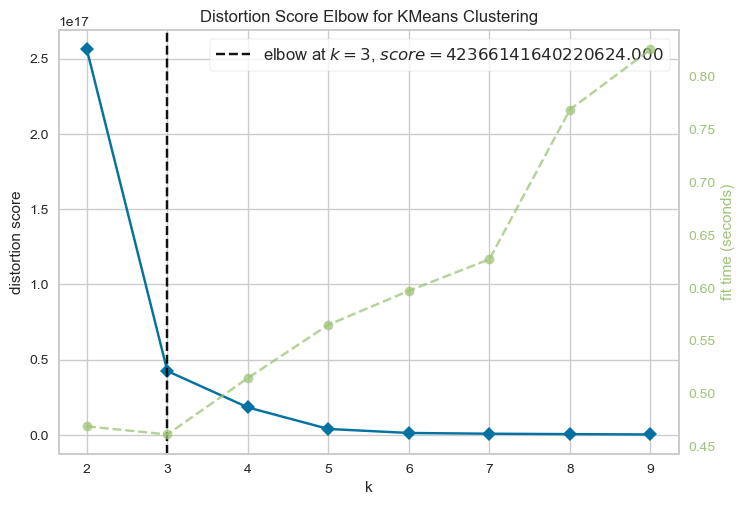

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
vis.fit(x)
vis.show()

In [57]:
model = KMeans(3) 

In [58]:
model = model.fit(x)

In [59]:
pred = model.predict(x)

In [60]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
x["cluster"] = pred

In [62]:
x.head()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,cluster
0,3420,2,128.58,3,1,1,5,0
1,3420,2,128.58,3,1,1,5,0
2,3882,4,217.44,1,1,1,3,0
3,3882,4,217.44,1,1,1,3,0
4,3147,4,217.44,5,1,1,7,0


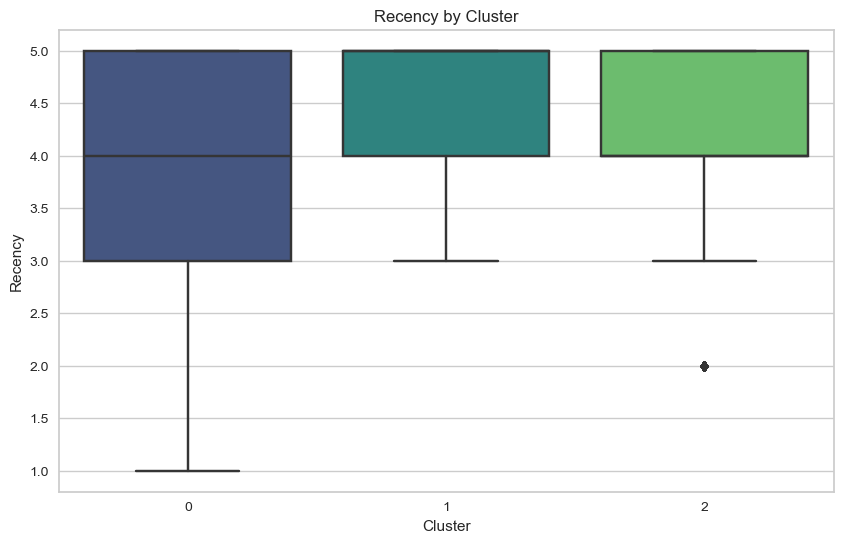

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='RecencyScore', data=x, palette='viridis')
plt.title('Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.show()

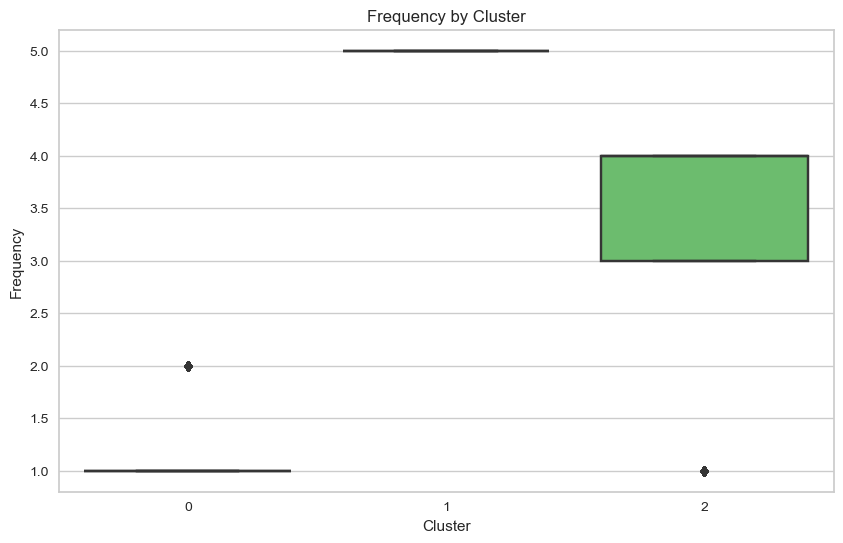

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='FrequencyScore', data=x, palette='viridis')
plt.title('Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

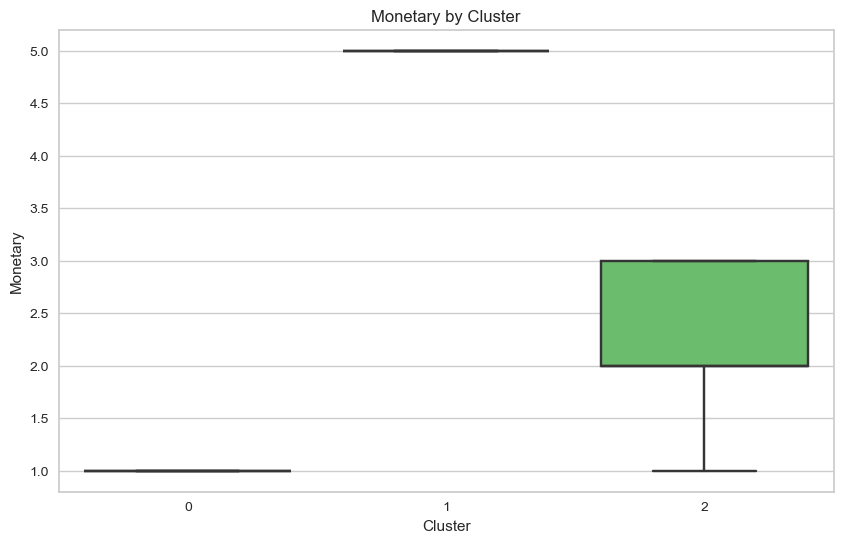

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='MonetaryScore', data=x, palette='viridis')
plt.title('Monetary by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.show()

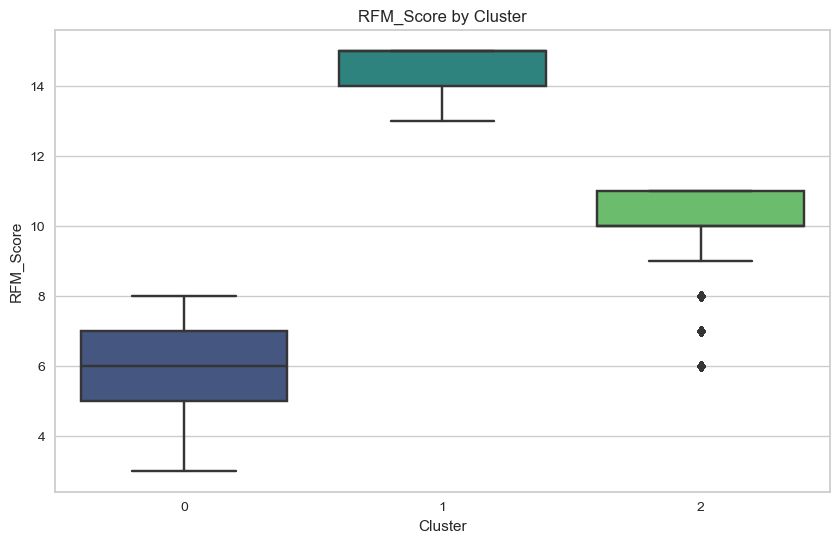

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='RFM_Score', data=x, palette='viridis')
plt.title('RFM_Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('RFM_Score')
plt.show()

In [69]:
silhouette_score(x, pred)

0.8247817328954138

### Results

For silhouette_score, our model is working with over %82 accuracy and is acceptable.